In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import datetime
import pytz
import matplotlib.pyplot as plt
import preprocessing as prep
from collections import namedtuple
from bb_binary import FrameContainer, Repository, load_frame_container
import numpy as np
import numpy.ma as npma
import datetime
import csv
import seaborn as sns
from collections import Counter
sns.set_context("paper")
import hatching as ht

In [3]:
%matplotlib inline

# Stuff

In [3]:
start = "2016-07-26T00:00:00Z"
start_dt = datetime.datetime.strptime(start, "%Y-%m-%dT%H:%M:%SZ").replace(tzinfo=pytz.UTC)
start_ts = start_dt.timestamp()
end_dt = start_dt + datetime.timedelta(minutes=5)
end_ts = end_dt.timestamp()

In [ ]:
def getIDS(start_ts, end_ts, conf, year):
    df0 = prep.getDF("/mnt/data2016/", start_ts, end_ts, 0)
    df1 = prep.getDF("/mnt/data2016/", start_ts, end_ts, 1)
    df2 = prep.getDF("/mnt/data2016/", start_ts, end_ts, 2)
    df3 = prep.getDF("/mnt/data2016/", start_ts, end_ts, 3)
    
    data = pd.concat([df0,df1,df2,df3])
    
    data = prep.calcIds(data, conf, year)
    
    df = DataFrame(data.groupby(by="id").size(), columns=["fre"]).reset_index()
    
    for r in df.iterrows():
        id_list[r[1].id] += r[1].fre

In [ ]:
steps = int(24*60/5)

In [ ]:
60/5

In [ ]:
id_list = [0] * 4096

for i in list(range(steps))[:12]:
    getIDS(start_ts, end_ts, 0.95, 2016)
    
    start_ts = end_ts
    end_ts += 5 * 60
    print(start_ts, end_ts)

In [12]:
aa = ht.get_all_bees_age(start_dt)

In [ ]:
stat = DataFrame((id_list), index = list(range(4096)), columns=["freq"]).reset_index()

In [ ]:
stat["age"] = stat["index"].apply(lambda x: aa.iloc[x].age)

In [ ]:
stat.head(10)

In [ ]:
stat.freq.hist(bins=100)

In [ ]:

fig, ax = plt.subplots()
stat[stat.age < 0].freq.hist(bins=100, ax=ax)
ax.set_yscale('log')

In [ ]:
np.percentile(stat[stat.age < 0].freq, q=99)

In [ ]:
fig, ax = plt.subplots()
stat[stat.age >= 0].freq.hist(bins=100)
ax.set_yscale('log')

In [ ]:
np.array([1,2,3])+np.array([1,2,3])

In [ ]:
id_list = np.array([0] * 4096)

In [ ]:
id_list + np.array([3] * 4096)

In [ ]:
id_list

In [ ]:
DataFrame([[11,22,22],[11,22,3], [2,3,4]], index=['A','B', 'C'], columns=['id', 'b', 'c']).groupby(by='id').size()

In [10]:
f = pd.read_csv('testids.csv', header=None, names=['id', 'freq'])

In [13]:
f["age"] = f["id"].apply(lambda x: aa.iloc[x].age)

In [17]:
f.query('age < 0')

,id,freq,age
0,0,1,-100
1,1,2,-2
2,2,8,-100
4,4,5,-27
7,7,138,-100
11,11,1,-15
13,13,11,-100
14,14,44,-100
17,17,5537,-100
19,19,7,-15


In [ ]:
# Bienen rausfischen

In [4]:
df0 = prep.getDF("/mnt/data2016/", start_ts, end_ts, 0)
df1 = prep.getDF("/mnt/data2016/", start_ts, end_ts, 1)
df2 = prep.getDF("/mnt/data2016/", start_ts, end_ts, 2)
df3 = prep.getDF("/mnt/data2016/", start_ts, end_ts, 3)
data = pd.concat([df0,df1,df2,df3])

In [5]:
def getDetWithID(df, id):
    df = prep.calcIds(df, 0.95, 2016)
    return df[df.id == id]

In [6]:
res = getDetWithID(data, 17)

In [7]:
res

,idx,xpos,ypos,radius,zRotation,frame_idx,timestamp,cam_id,fc_id,frame_id,confidence,id
47258,33,962,1702,22.929085,1.641236,409,1.469491e+09,3,18029899247792549722,15523567918824866763,0.992157,17
47377,31,962,1702,22.945606,1.891792,410,1.469491e+09,3,18029899247792549722,18117020532787944282,1.000000,17
47497,31,938,1689,22.867502,2.061127,411,1.469491e+09,3,18029899247792549722,17843234826579378375,1.000000,17
47621,30,936,1689,22.826143,2.076247,412,1.469491e+09,3,18029899247792549722,17515868547313191665,1.000000,17
47744,31,936,1689,22.888643,2.122766,413,1.469491e+09,3,18029899247792549722,12345592913239308974,1.000000,17
47867,31,949,1676,22.958576,2.107123,414,1.469491e+09,3,18029899247792549722,10998477122412450186,1.000000,17
47991,32,949,1676,22.915888,2.183439,415,1.469491e+09,3,18029899247792549722,13982187246528672327,1.000000,17
48115,32,935,1677,22.971308,2.275588,416,1.469491e+09,3,18029899247792549722,17059633180998752499,0.976471,17
48243,31,948,1689,22.946896,1.986638,417,1.469491e+09,3,18029899247792549722,13316071905269373045,0.984314,17
48493,30,936,1689,23.016991,2.118561,419,1.469491e+09,3,18029899247792549722,10184329007651620946,0.992157,17


limit_output extension: Maximum message size of 10000 exceeded with 20202 characters

In [8]:
res = getDetWithID(data, 888)

In [9]:
res

,idx,xpos,ypos,radius,zRotation,frame_idx,timestamp,cam_id,fc_id,frame_id,confidence,id
5940,15,825,2987,22.681152,-2.025156,63,1.469491e+09,0,10523462747265020228,10368079611057354619,0.976471,888
6308,11,787,2999,22.780539,-1.837463,67,1.469491e+09,0,10523462747265020228,11915520625460728690,0.992157,888
6399,10,775,3000,22.811131,-1.743635,68,1.469491e+09,0,10523462747265020228,13810404924703824888,1.000000,888
6860,9,763,3000,22.660208,-2.075979,73,1.469491e+09,0,10523462747265020228,11925896762619940184,0.976471,888
9194,15,763,2999,22.559982,2.846528,98,1.469491e+09,0,10523462747265020228,13723425205579074769,0.976471,888
9285,14,764,3000,22.626305,2.942298,99,1.469491e+09,0,10523462747265020228,9458712840975548762,0.968627,888
9377,14,763,3000,22.640005,2.966255,100,1.469491e+09,0,10523462747265020228,11460501446706551243,0.992157,888
9466,14,763,3000,22.647234,2.951607,101,1.469491e+09,0,10523462747265020228,15441285705509221907,1.000000,888
9557,12,763,3000,22.612453,2.953726,102,1.469491e+09,0,10523462747265020228,10297576646843793508,1.000000,888
9648,12,763,3000,22.580841,2.925766,103,1.469491e+09,0,10523462747265020228,10730338510913452884,1.000000,888


limit_output extension: Maximum message size of 10000 exceeded with 20225 characters

# Read Frequency from file and plot

In [4]:
def plotHist(df, ex):
    df = df[df.id.isin(ex) == False]
    fig, ax = plt.subplots()
    df[df.age < 0].freq.hist(bins=100, ax=ax)
    ax.set_xlim((0,200000))
    ax.set_yscale('log')
    print('Negative Age:')
    print('mean ',df[df.age < 0].freq.mean())
    print('median ', df[df.age < 0].freq.median())
    print('mode ', df[df.age < 0].freq.mode())

    fig, ax = plt.subplots()
    df[df.age >= 0].freq.hist(bins=100, ax=ax)
    #ax.set_yscale('log')
    ax.set_xlim((0,200000))
    print(df[df.age >= 0].freq.mean())
    print(df[df.age >= 0].freq.median())
    print(df[df.age >= 0].freq.mode())
    
    fig, ax = plt.subplots()
    df.freq.hist(bins=100, ax=ax)
    #ax.set_yscale('log')
    ax.set_xlim((0,200000))
    print(df.freq.mean())
    print(df.freq.median())
    print(df.freq.mode())

    return df

In [5]:
def addAge(df, start_dt):
    aa = ht.get_all_bees_age(start_dt)
    df["age"] = df["id"].apply(lambda x: aa.iloc[x].age)

# 14.08.2016

Negative Age:
mean  764.566929134
median  385.0
mode  0    121
dtype: int64
33813.377558
1402.0
0    62
dtype: int64
24543.4903067
772.0
0    31
1    39
2    62
dtype: int64


5509.519999999975

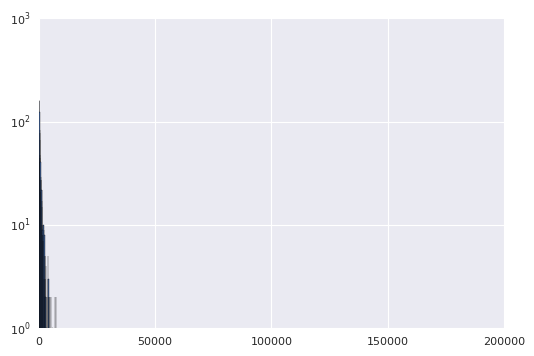

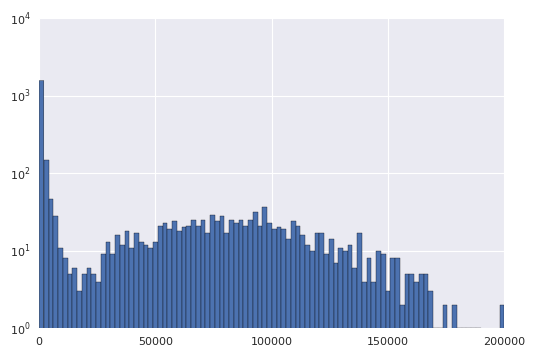

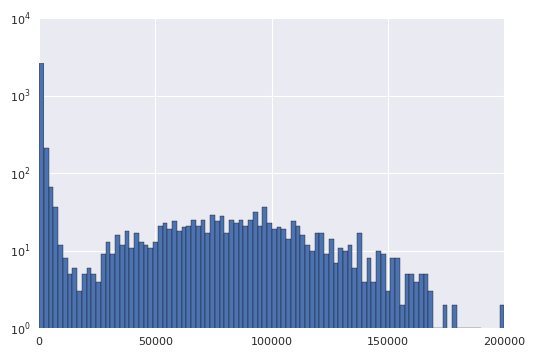

In [45]:
f = pd.read_csv('ID_frequencies_2016-08-14_95conf_24h.csv', header=None, names=['id', 'freq'])
start_dt = datetime.datetime.strptime("2016-08-14", "%Y-%m-%d").replace(tzinfo=pytz.UTC)
addAge(f, start_dt)
f = plotHist(f, ex)
np.percentile(f[f.age < 0].freq, q=99)

In [46]:
print(len(f.query('age >= 0 & freq < 5510')))

print(len(f.query('age < 0 & freq < 5510')))

print(len(f.query('freq >= 5510')))

1748
1131
1196


In [47]:
f.query('age < 0 & freq > 10000')

,id,freq,age


In [48]:
f.query('freq >= 5510').id.to_csv('IDlist_2016-08-14_95conf_24h.csv')

# 17.08.2016

Negative Age:
mean  742.342427093
median  403.0
mode  0    62
dtype: int64
29495.0796813
1072.0
0    91
dtype: int64
21994.6723926
691.0
0    107
dtype: int64
5301.4


,id,freq,age


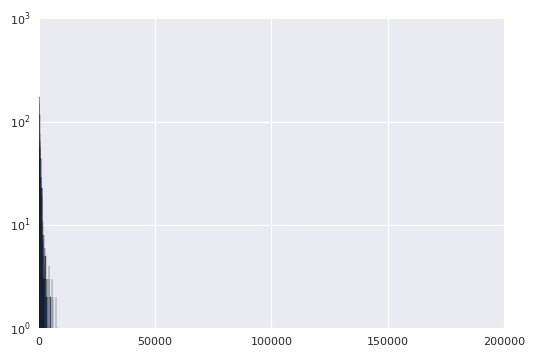

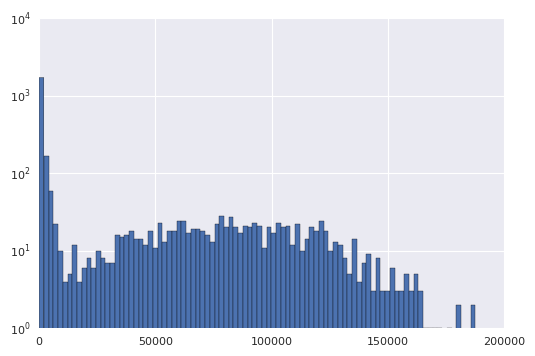

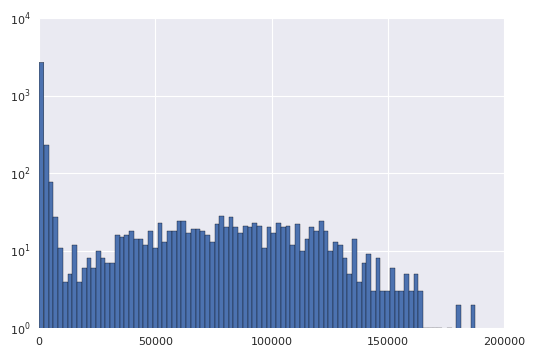

In [49]:
f = pd.read_csv("ID_frequencies_2016-08-17_95conf_24h.csv", header=None, names=['id', 'freq'])

start_dt1 = datetime.datetime.strptime("2016-08-17", "%Y-%m-%d").replace(tzinfo=pytz.UTC)

addAge(f, start_dt1)

f = plotHist(f, ex)

print(np.percentile(f[f.age < 0].freq, q=99))

f.query('age < 0 & freq > 10000')

In [50]:
print(len(f.query('age >= 0 & freq < 5301')))
print(len(f.query('age < 0 & freq < 5301')))
print(len(f.query('freq >= 5301')))

1926
1052
1097


In [51]:
f.query('freq >= 5301').id.to_csv('IDlist_2016-08-17_95conf_24h.csv')

# 20.08.2016

In [58]:
f = pd.read_csv("ID_frequencies_2016-08-20_95conf_24h.csv", header=None, names=['id', 'freq'])

Negative Age:
mean  515.737535278
median  230.0
mode  0    55
dtype: int64
25753.4757636
470.0
0    51
dtype: int64
19169.9872393
341.0
0    55
dtype: int64
4595.9


,id,freq,age


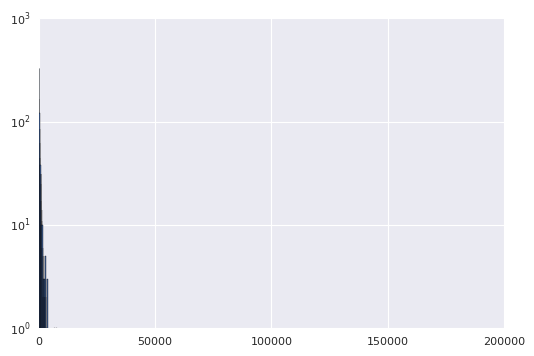

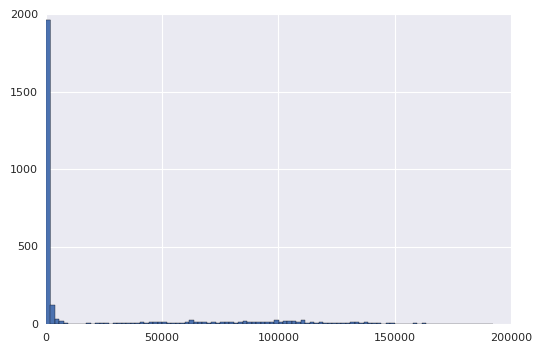

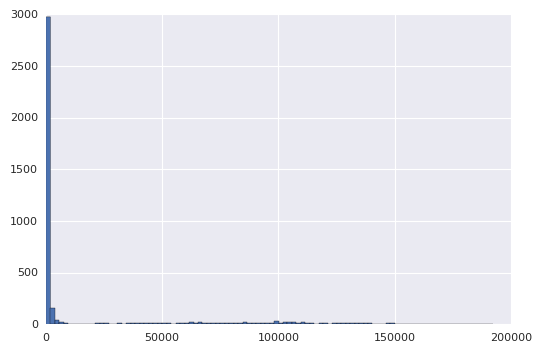

In [60]:
start_dt1 = datetime.datetime.strptime("2016-08-20", "%Y-%m-%d").replace(tzinfo=pytz.UTC)

addAge(f, start_dt1)
f = plotHist(f, ex)

print(np.percentile(f[f.age < 0].freq, q=99))

f.query('age < 0 & freq > 10000')

In [61]:
print(len(f.query('age >= 0 & freq < 4596')))
print(len(f.query('age < 0 & freq < 4596')))
print(len(f.query('freq >= 4596')))

2100
1052
923


In [62]:
f.query('freq >= 4596').id.to_csv('IDlist_2016-08-20_95conf_24h.csv')

# 02.09.2016

Negative Age:
mean  187.104143337
median  35.0
mode  0    3
dtype: int64
10334.8271527
45.5
0    2
dtype: int64
8111.04392638
43.0
0    2
dtype: int64
2135.2


,id,freq,age
2372,2372,5111,-100


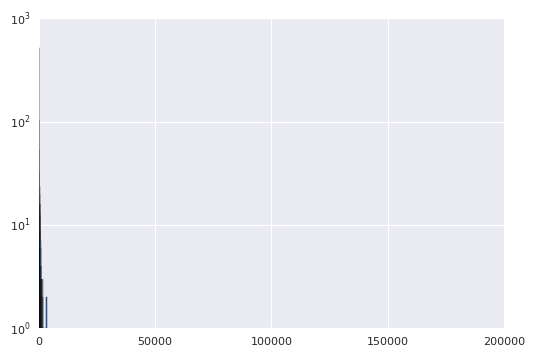

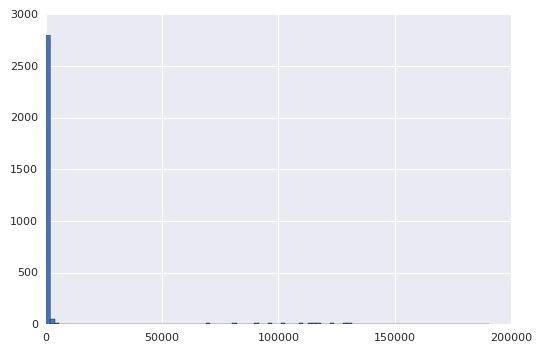

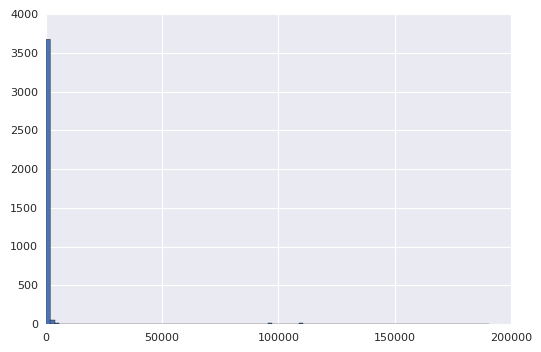

In [67]:
f = pd.read_csv("ID_frequencies_2016-09-02_95conf_24h.csv", header=None, names=['id', 'freq'])

start_dt1 = datetime.datetime.strptime("2016-09-02", "%Y-%m-%d").replace(tzinfo=pytz.UTC)

addAge(f, start_dt1)
f= plotHist(f, ex)

print(np.percentile(f[f.age < 0].freq, q=99))

f.query('age < 0 & freq > 5000')

In [64]:
print(len(f.query('age >= 0 & freq < 2135')))
print(len(f.query('age < 0 & freq < 2135')))
print(len(f.query('freq >= 2135')))

f.query('freq >= 2135').id.to_csv('IDlist_2016-09-02_95conf_24h.csv')

2807
884
384


# 08_13_10

Negative Age:
mean  751.032399299
median  398.0
mode  0    164
dtype: int64
34043.8100273
1672.0
0    60
dtype: int64
24711.3721159
839.5
0    60
1    69
dtype: int64
5776.93


,id,freq,age


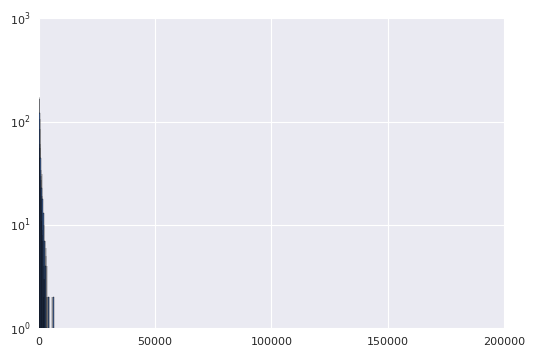

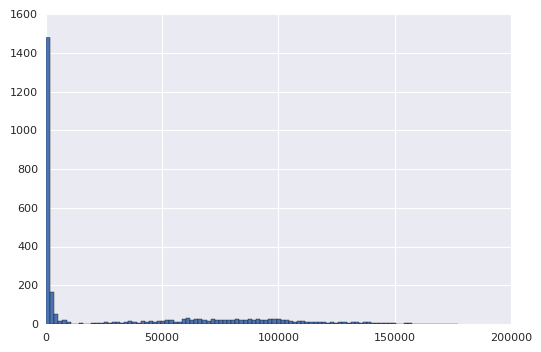

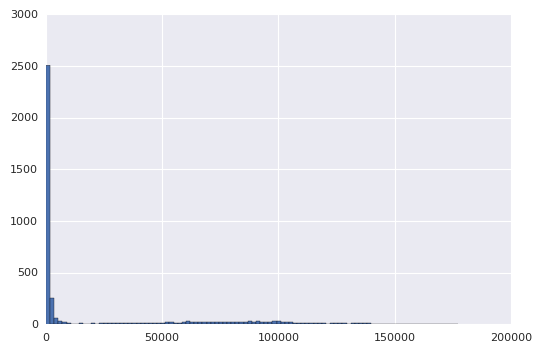

In [22]:
f = pd.read_csv("ID_frequencies_2016-08-13_95conf_24h.csv", header=None, names=['id', 'freq'])

start_dt1 = datetime.datetime.strptime("2016-08-13", "%Y-%m-%d").replace(tzinfo=pytz.UTC)

addAge(f, start_dt1)
f= plotHist(f, ex)

print(np.percentile(f[f.age < 0].freq, q=99))

f.query('age < 0 & freq > 10000')

In [23]:
print(len(f.query('age >= 0 & freq < 5777')))
print(len(f.query('age < 0 & freq < 5777')))
print(len(f.query('freq >= 5777')))

f.query('freq >= 5777').id.to_csv('IDlist_2016-08-13_95conf_24h.csv')

1699
1130
1245


# 2016_08_16

Negative Age:
mean  759.435028249
median  431.0
mode  0    34
dtype: int64
29696.4541833
1370.5
0    40
dtype: int64
22153.2253314
783.0
0    40
dtype: int64
5184.0


,id,freq,age


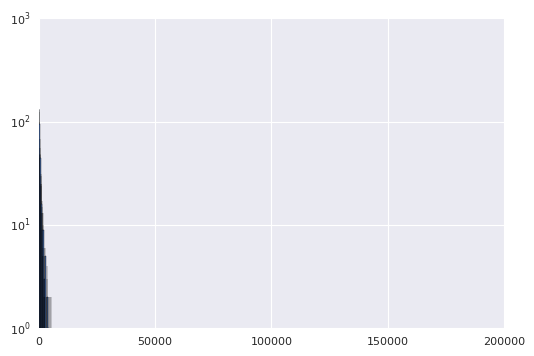

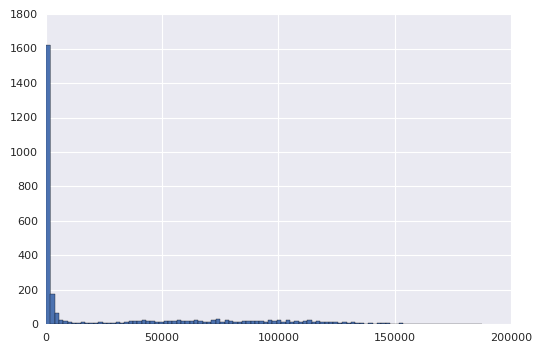

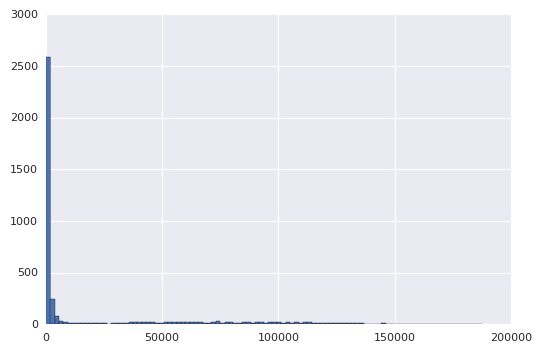

In [25]:
f = pd.read_csv("ID_frequencies_2016-08-16_95conf_24h.csv", header=None, names=['id', 'freq'])

start_dt1 = datetime.datetime.strptime("2016-08-16", "%Y-%m-%d").replace(tzinfo=pytz.UTC)

addAge(f, start_dt1)
f= plotHist(f, ex)

print(np.percentile(f[f.age < 0].freq, q=99))

f.query('age < 0 & freq > 10000')

In [26]:
print(len(f.query('age >= 0 & freq < 5184')))
print(len(f.query('age < 0 & freq < 5184')))
print(len(f.query('freq >= 5184')))

1853
1051
1170


In [27]:
f.query('freq >= 5184').id.to_csv('IDlist_2016-08-16_95conf_24h.csv')

# 2016_08_22

Negative Age:
mean  496.219537815
median  251.0
mode  0    58
1    62
dtype: int64
22371.470852
519.5
0    83
dtype: int64
17259.7282769
395.5
0    83
dtype: int64
4112.73


,id,freq,age


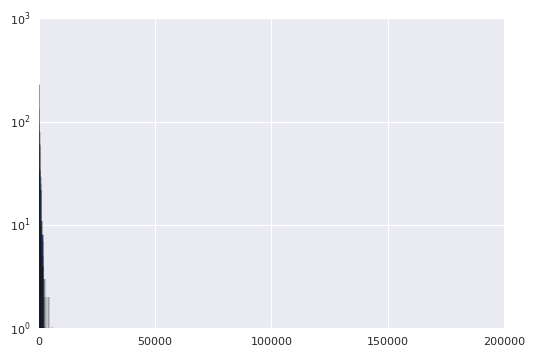

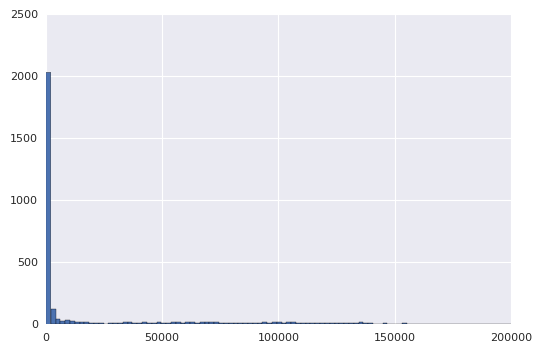

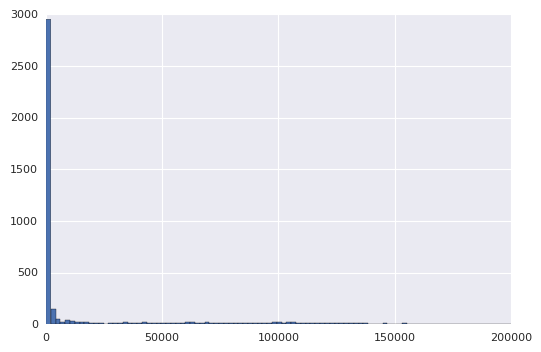

In [28]:
f = pd.read_csv("ID_frequencies_2016-08-22_95conf_24h.csv", header=None, names=['id', 'freq'])

start_dt1 = datetime.datetime.strptime("2016-08-22", "%Y-%m-%d").replace(tzinfo=pytz.UTC)

addAge(f, start_dt1)
f= plotHist(f, ex)

print(np.percentile(f[f.age < 0].freq, q=99))

f.query('age < 0 & freq > 10000')

In [29]:
print(len(f.query('age >= 0 & freq < 4113')))
print(len(f.query('age < 0 & freq < 4113')))
print(len(f.query('freq >= 4113')))

2154
942
978


In [30]:
f.query('freq >= 4113').id.to_csv('IDlist_2016-08-22_95conf_24h.csv')

# 2016_08_24

Negative Age:
mean  532.214125561
median  270.0
mode  0    61
dtype: int64
21763.3774356
460.0
0    20
dtype: int64
17114.826215
386.0
0    61
dtype: int64
3684.57


,id,freq,age


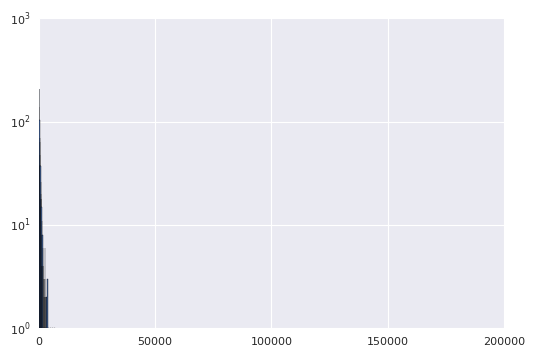

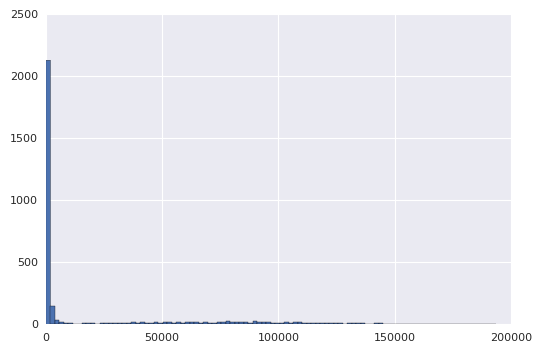

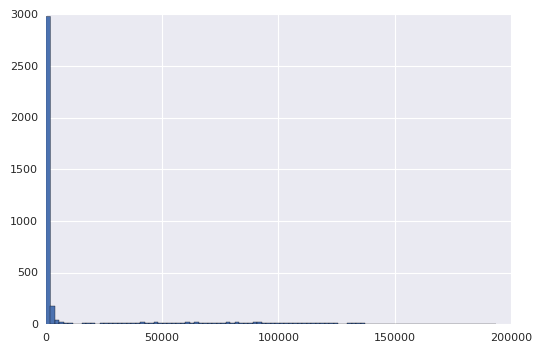

In [31]:
f = pd.read_csv("ID_frequencies_2016-08-24_95conf_24h.csv", header=None, names=['id', 'freq'])

start_dt1 = datetime.datetime.strptime("2016-08-24", "%Y-%m-%d").replace(tzinfo=pytz.UTC)

addAge(f, start_dt1)
f= plotHist(f, ex)

print(np.percentile(f[f.age < 0].freq, q=99))

f.query('age < 0 & freq > 10000')

In [32]:
print(len(f.query('age >= 0 & freq < 3685')))
print(len(f.query('age < 0 & freq < 3685')))
print(len(f.query('freq >= 3685')))

2268
883
923


In [33]:
f.query('freq >= 3685').id.to_csv('IDlist_2016-08-24_95conf_24h.csv')

# 2016_08_25

Negative Age:
mean  428.273542601
median  188.0
mode  0    100
dtype: int64
19096.3642363
299.0
0    41
dtype: int64
15008.9963181
260.0
0    41
dtype: int64
3904.7


,id,freq,age


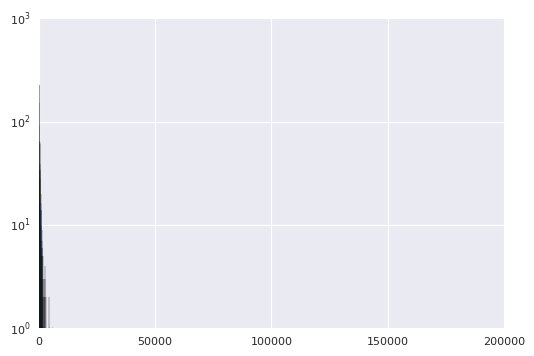

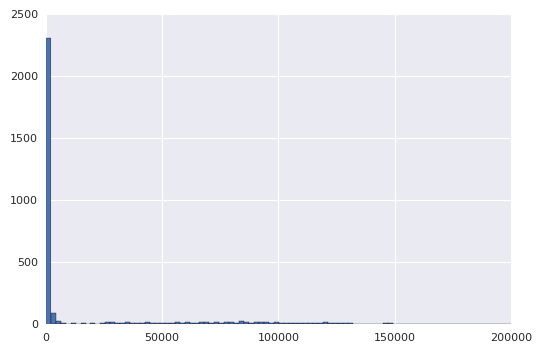

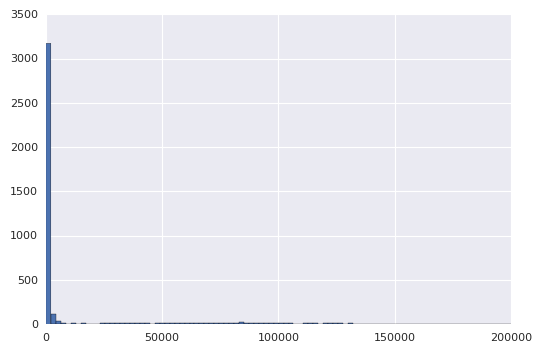

In [34]:
f = pd.read_csv("ID_frequencies_2016-08-25_95conf_24h.csv", header=None, names=['id', 'freq'])

start_dt1 = datetime.datetime.strptime("2016-08-25", "%Y-%m-%d").replace(tzinfo=pytz.UTC)

addAge(f, start_dt1)
f= plotHist(f, ex)

print(np.percentile(f[f.age < 0].freq, q=99))

f.query('age < 0 & freq > 10000')

In [35]:
print(len(f.query('age >= 0 & freq < 3905')))
print(len(f.query('age < 0 & freq < 3905')))
print(len(f.query('freq >= 3905')))

2400
883
791


In [36]:
f.query('freq >= 3905').id.to_csv('IDlist_2016-08-25_95conf_24h.csv')

# Liste an Bienen die man von Anfang an ausschliesst:

es gab 10 Bienen die "later tagged" sind, zu dienen weiss man kein Alter, die falle komplett raus

In [7]:
hatching = pd.read_csv("hatchdates2016.csv")

In [8]:
s = hatching["later tagged"]

In [19]:
ex = list(s.dropna().index)

In [20]:
ex

[2, 74, 2045, 3172, 3764, 3796, 3827, 3836, 3844, 3940]

In [21]:
ex.extend([17,127,131,155,2357,2380,2388,3103,3119,3165,3367, 3503])

17   -----
168  --xxx
801  -----
888  -----
1580 22.08.2016? xxxx
1751 QQQQQ
2045 -----
2357 -----
2607 --xxx


In [ ]:
17   -----
168  --xxx
801  -----
888  -----
2045 -----
2357 -----
2607 --xxx

In [139]:
ex.extend([17,168,801,888,2045,2357,2607])

In [140]:
ex

[2,
 74,
 2045,
 3172,
 3764,
 3796,
 3827,
 3836,
 3844,
 3940,
 17,
 168,
 801,
 888,
 2045,
 2357,
 2607]

In [183]:
f = f[f.id.isin(ex) == False]

AttributeError: 'NoneType' object has no attribute 'id'

In [284]:
len(hatching[hatching.birthdate =='02.08.2016'])

119

In [285]:
1225+128

1353

In [291]:
np.array([603,
672, 
696,
761, 
787]).std() 


65.4626611130345

In [290]:
np.array([41064, 34970, 34740, 35416, 36825]).std()


2345.047206347881

In [294]:
np.array([
3858,
4239,
4686,
5325,
5577
]).std()

644.14128884896047

In [329]:
atetime.datetime.fromtimestamp(b, tz=pytz.UTC)

In [330]:
data.head(2)

,idx,xpos,ypos,radius,zRotation,frame_idx,timestamp,cam_id,fc_id,frame_id,confidence,id
3,3,437,1137,22.808411,-2.243370,0,1.469491e+09,0,10523462747265020228,10713957194713100599,1.000000,1771
6,6,575,3337,22.874407,-0.647871,0,1.469491e+09,0,10523462747265020228,10713957194713100599,0.984314,1524


In [318]:
data = prep.calcIds(data, 0.95, 2016)

In [319]:
data.head()

,idx,xpos,ypos,radius,zRotation,frame_idx,timestamp,cam_id,fc_id,frame_id,confidence,id
3,3,437,1137,22.808411,-2.243370,0,1.469491e+09,0,10523462747265020228,10713957194713100599,1.000000,1771
6,6,575,3337,22.874407,-0.647871,0,1.469491e+09,0,10523462747265020228,10713957194713100599,0.984314,1524
8,8,639,862,22.746553,-0.010810,0,1.469491e+09,0,10523462747265020228,10713957194713100599,0.992157,3473
9,9,750,1374,22.956480,-1.241533,0,1.469491e+09,0,10523462747265020228,10713957194713100599,1.000000,2282
10,10,801,1601,22.764263,1.679263,0,1.469491e+09,0,10523462747265020228,10713957194713100599,0.984314,1733


In [331]:
data.shape

(263998, 12)

In [332]:
lo = removeDetectionsList(data, '2016-07-26')

In [334]:
lo.shape

(259473, 12)

In [335]:
263998-259473

4525

In [337]:
liste = pd.Series.from_csv('IDlist_2016-07-26_95conf_24h.csv')

In [346]:
liste[liste==3836]

Series([], dtype: int64)

In [350]:
dt = datetime.datetime.fromtimestamp(start_ts, tz=pytz.UTC)

In [352]:
dt.strftime("%Y-%m-%d")

'2016-07-26'